Read the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
observations = pd.read_csv('https://raw.githubusercontent.com/noo-rashbass/synthetic-data-service/master/Aisha/observations.csv')

A try to group columns according their data types: int64, float64 and object. Surprisingly float64 columns are all columns containing numerical datas, which are exactly what we need for pearsons r correlation test.

In [3]:
observ_index = observations.keys()
observ_index_list = observ_index.tolist()
observ_index_array = np.array(observ_index_list)
observ_type_array = [0]*54
for i in range(observ_index_array.size):
    name = observ_index_array[i]
    temp = str(observations[name].dtype)
    observ_type_array[i]=temp
observ_type_array = np.array(observ_type_array)
type_dic = {}
for types in set(observ_type_array):
    type_dic[types] = observations.iloc[:,np.where(observ_type_array == types)[0]]
float_columns = type_dic['float64']
float_columns_values = float_columns.dropna().values

In [118]:
from scipy.stats import pearsonr

float_columns_index = (float_columns.keys()).tolist()
n = len(float_columns_index)
ini = [ [ None for y in range( n ) ] 
             for x in range( n ) ]

#pearsonr returns two values: the correlation coefficient and significance test probability p
#so we create two empty dataframes to store them
coefficient_table = pd.DataFrame(ini,index = float_columns_index,columns = float_columns_index)
p_table = coefficient_table.copy()
coe_and_p_table = coefficient_table.copy()

for i in range(n):
    for j in range(i+1,n):
        name1 = float_columns_index[i]
        name2 = float_columns_index[j]
        obs_1 = float_columns[name1].dropna()
        obs_2 = float_columns[name2].dropna()
        dataframe = pd.DataFrame({name1: obs_1, name2: obs_2})
        
        values = dataframe.dropna().values
        (coe,p) = pearsonr(values[:,0],values[:,1])
        coefficient_table.loc[name1,name2]=coe
        p_table.loc[name1,name2]=p
        coe_and_p_table.loc[name1,name2]=(coe,p)
        
display(coefficient_table)
display(p_table)
display(coe_and_p_table)

,Abdominal pain duration (days) [EUPATH_0000154],Age at visit (years) [EUPATH_0000113],Anorexia duration (days) [EUPATH_0000155],"Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]",Cough duration (days) [EUPATH_0000156],Days since enrollment [EUPATH_0000191],Diarrhea duration (days) [EUPATH_0000157],Fatigue duration (days) [EUPATH_0000158],"Fever, subjective duration (days) [EUPATH_0000164]",Headache duration (days) [EUPATH_0000159],Height (cm) [EUPATH_0010075],Hemoglobin (g/dL) [EUPATH_0000047],Jaundice duration (days) [EUPATH_0000160],Joint pains duration (days) [EUPATH_0000161],Muscle aches duration (days) [EUPATH_0000162],Seizures duration (days) [EUPATH_0000163],Temperature (C) [EUPATH_0000110],Vomiting duration (days) [EUPATH_0000165],Weight (kg) [EUPATH_0000732]
Abdominal pain duration (days) [EUPATH_0000154],None,0.117787,0.127538,0.0239768,-0.0159098,-0.0549489,0.0848317,0.142351,0.147728,0.158502,0.102307,-0.0110608,0.000605179,0.0886462,0.0918903,0.000971233,0.024795,0.0600246,0.118288
Age at visit (years) [EUPATH_0000113],None,None,-0.0189772,-0.086354,-0.0676333,0.135862,-0.043476,0.165738,-0.0493638,0.17963,0.793099,0.341208,-0.0046255,0.164969,0.117759,-0.0142423,-0.183555,-0.0567948,0.846123
Anorexia duration (days) [EUPATH_0000155],None,None,None,0.0612022,0.117992,-0.0825309,0.0396791,0.285324,0.26924,0.128103,-0.0208671,-0.0930792,0.00989796,0.0823314,0.12449,0.0108372,0.132967,0.16316,-0.00740979
"Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]",None,None,None,None,0.0135067,-0.0443281,0.00838325,0.0216154,0.158992,0.0975935,-0.0965993,-0.134156,0.0109899,0.0107661,0.00672161,0.0900655,0.318598,0.126783,-0.0830991
Cough duration (days) [EUPATH_0000156],None,None,None,None,None,-0.159125,0.0137463,0.0737887,0.342011,0.0969921,-0.101255,-0.0948358,-0.000177794,0.0170346,0.0179014,2.96406e-05,0.133904,0.0461332,-0.064104
Days since enrollment [EUPATH_0000191],None,None,None,None,None,None,-0.0767502,-0.0401281,-0.22406,-0.0536549,0.255265,0.137787,-0.00604481,-0.0342937,-0.0292701,-0.0125797,-0.0930214,-0.0691319,0.111024
Diarrhea duration (days) [EUPATH_0000157],None,None,None,None,None,None,None,0.00497903,0.0621694,-0.0112054,-0.0941134,-0.0574639,-0.0014312,-0.00348049,0.000356866,-0.00227172,0.0167441,0.131971,-0.0494835
Fatigue duration (days) [EUPATH_0000158],None,None,None,None,None,None,None,None,0.308857,0.282978,0.113476,-0.000808012,0.00217516,0.261133,0.295954,0.00067793,0.0695854,0.0646668,0.128511
"Fever, subjective duration (days) [EUPATH_0000164]",None,None,None,None,None,None,None,None,None,0.373741,-0.0851362,-0.208526,0.0123264,0.154626,0.138742,0.019697,0.380864,0.213258,-0.0420927
Headache duration (days) [EUPATH_0000159],None,None,None,None,None,None,None,None,None,None,0.150224,-0.0159615,-0.00213739,0.233848,0.186661,0.000779053,0.162891,0.0591242,0.1488


,Abdominal pain duration (days) [EUPATH_0000154],Age at visit (years) [EUPATH_0000113],Anorexia duration (days) [EUPATH_0000155],"Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]",Cough duration (days) [EUPATH_0000156],Days since enrollment [EUPATH_0000191],Diarrhea duration (days) [EUPATH_0000157],Fatigue duration (days) [EUPATH_0000158],"Fever, subjective duration (days) [EUPATH_0000164]",Headache duration (days) [EUPATH_0000159],Height (cm) [EUPATH_0010075],Hemoglobin (g/dL) [EUPATH_0000047],Jaundice duration (days) [EUPATH_0000160],Joint pains duration (days) [EUPATH_0000161],Muscle aches duration (days) [EUPATH_0000162],Seizures duration (days) [EUPATH_0000163],Temperature (C) [EUPATH_0000110],Vomiting duration (days) [EUPATH_0000165],Weight (kg) [EUPATH_0000732]
Abdominal pain duration (days) [EUPATH_0000154],None,2.22911e-144,4.10074e-169,1.12524e-06,0.000573394,1.13924e-32,1.42052e-75,1.10674e-199,7.8418e-227,6.4945e-259,1.61645e-87,0.0371731,0.895792,2.18964e-79,1.30887e-83,0.833515,7.96516e-08,1.15439e-38,6.29952e-117
Age at visit (years) [EUPATH_0000113],None,None,2.82179e-05,1.24167e-71,1.69003e-50,2.11403e-199,7.98018e-22,1.28114e-271,1.12321e-27,0,0,0,0.307383,7.20891e-273,1.42786e-136,0.00167287,0,4.22042e-36,0
Anorexia duration (days) [EUPATH_0000155],None,None,None,8.9695e-37,1.98217e-150,2.47262e-74,1.9901e-18,0,0,1.27959e-169,4.85432e-05,4.05383e-71,0.0290054,9.84756e-69,1.72286e-152,0.0168259,7.40483e-191,1.39837e-287,0.148513
"Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]",None,None,None,None,0.00520535,4.53719e-20,0.0828937,1.84574e-05,2.8998e-240,2.64578e-87,1.29017e-73,2.16201e-146,0.0230248,0.0317255,0.183915,9.5641e-78,0,8.28155e-153,4.60447e-55
Cough duration (days) [EUPATH_0000156],None,None,None,None,None,1.14657e-273,0.00241345,8.62379e-55,0,9.19232e-98,6.0116e-87,8.16758e-74,0.968704,0.000294973,0.000164328,0.994781,1.10101e-193,2.26821e-24,6.26726e-36
Days since enrollment [EUPATH_0000191],None,None,None,None,None,None,1.49952e-64,2.45359e-17,0,4.67676e-31,0,1.88667e-154,0.182224,3.12804e-13,7.1648e-10,0.00550385,4.45195e-94,1.09977e-52,1.34032e-104
Diarrhea duration (days) [EUPATH_0000157],None,None,None,None,None,None,None,0.293476,6.28419e-43,0.0155797,2.51652e-75,3.93364e-28,0.752144,0.459593,0.940122,0.616188,0.00021913,3.89205e-188,4.62979e-22
Fatigue duration (days) [EUPATH_0000158],None,None,None,None,None,None,None,None,0,0,3.41084e-105,0.881516,0.646335,0,0,0.886281,6.48437e-49,1.80492e-42,4.72953e-135
"Fever, subjective duration (days) [EUPATH_0000164]",None,None,None,None,None,None,None,None,None,0,6.23205e-62,0,0.00652399,1.3914e-239,2.68574e-189,1.38139e-05,0,0,2.16182e-16
Headache duration (days) [EUPATH_0000159],None,None,None,None,None,None,None,None,None,None,6.80102e-187,0.00269826,0.644585,0,0,0.866479,2.04422e-274,2.34372e-37,5.70272e-184


,Abdominal pain duration (days) [EUPATH_0000154],Age at visit (years) [EUPATH_0000113],Anorexia duration (days) [EUPATH_0000155],"Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]",Cough duration (days) [EUPATH_0000156],Days since enrollment [EUPATH_0000191],Diarrhea duration (days) [EUPATH_0000157],Fatigue duration (days) [EUPATH_0000158],"Fever, subjective duration (days) [EUPATH_0000164]",Headache duration (days) [EUPATH_0000159],Height (cm) [EUPATH_0010075],Hemoglobin (g/dL) [EUPATH_0000047],Jaundice duration (days) [EUPATH_0000160],Joint pains duration (days) [EUPATH_0000161],Muscle aches duration (days) [EUPATH_0000162],Seizures duration (days) [EUPATH_0000163],Temperature (C) [EUPATH_0000110],Vomiting duration (days) [EUPATH_0000165],Weight (kg) [EUPATH_0000732]
Abdominal pain duration (days) [EUPATH_0000154],None,"(0.11778720317003932, 2.2291099333827103e-144)","(0.1275382623315603, 4.1007395325023074e-169)","(0.023976767902461553, 1.12523906011085e-06)","(-0.01590983132202506, 0.0005733937331631651)","(-0.054948906296151706, 1.1392381347240656e-32)","(0.08483174781980539, 1.420515972575922e-75)","(0.14235067507489887, 1.1067372487088526e-199)","(0.14772837722773147, 7.841802521665671e-227)","(0.15850179218102156, 6.494504742463418e-259)","(0.10230668609158207, 1.6164485341677403e-87)","(-0.01106079703103379, 0.03717313781114234)","(0.0006051790830137526, 0.8957924744839187)","(0.0886462371513288, 2.189644359850261e-79)","(0.09189028257978332, 1.3088676859378028e-83)","(0.0009712325825618896, 0.8335145548322214)","(0.02479495315145566, 7.965162190547827e-08)","(0.06002455142119835, 1.1543867735640404e-38)","(0.11828782851190969, 6.2995211908077655e-117)"
Age at visit (years) [EUPATH_0000113],None,None,"(-0.018977166978097, 2.8217916465573144e-05)","(-0.08635395397533512, 1.241665288698755e-71)","(-0.06763334675375544, 1.6900308245175774e-50)","(0.13586157412680744, 2.1140267735823957e-199)","(-0.043475992874819014, 7.980178500310005e-22)","(0.16573754287348086, 1.2811385199645717e-271)","(-0.04936375992264565, 1.123212717891013e-27)","(0.1796296195270391, 0.0)","(0.793099414594802, 0.0)","(0.3412078286055315, 0.0)","(-0.0046255030866088395, 0.30738316458441867)","(0.1649690077063491, 7.208907076409184e-273)","(0.1177592080637478, 1.4278623097124037e-136)","(-0.014242327252074225, 0.0016728711516976727)","(-0.18355464850238762, 0.0)","(-0.05679481211553811, 4.220418365811653e-36)","(0.8461226377264188, 0.0)"
Anorexia duration (days) [EUPATH_0000155],None,None,None,"(0.06120221968951097, 8.969498081329053e-37)","(0.11799197410682272, 1.9821682459833474e-150)","(-0.08253086957444938, 2.472618773028707e-74)","(0.039679144936391846, 1.990101264755215e-18)","(0.28532354841897084, 0.0)","(0.2692403276260207, 0.0)","(0.1281030181841925, 1.2795919566381576e-169)","(-0.0208670693403619, 4.854321223286127e-05)","(-0.0930792148324539, 4.053830262295691e-71)","(0.009897964697630171, 0.029005407783971787)","(0.08233137463150059, 9.847560212411787e-69)","(0.12449009125533059, 1.7228587645237626e-152)","(0.010837206691745444, 0.016825851572924752)","(0.13296692894263498, 7.404833062994397e-191)","(0.1631595723073079, 1.3983729742039362e-287)","(-0.007409787844532579, 0.14851267748061675)"
"Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]",None,None,None,None,"(0.013506717614227287, 0.005205347955667221)","(-0.04432813755970188, 4.5371899798023164e-20)","(0.008383249200238693, 0.08289368347124314)","(0.021615400131451173, 1.8457441588094324e-05)","(0.15899185697576196, 2.8998039933984386e-240)","(0.09759350391518787, 2.6457821081522717e-87)","(-0.09659929882591081, 1.2901734667396087e-73)","(-0.13415622527778542, 2.162010651733003e-146)","(0.010989888869849196, 0.023024752349720668)","(0.010766100080596398, 0.03172551560419876)","(0.006721608133850552, 0.18391544495334317)","(0.09006550675061067, 9.564099452051851e-78)","(0.31859772116459895, 0.0)","(0.126783001978383, 8.281545024414524e-153)","(-0.

Interpretation of the above result:
-Normally, the correlation gets stronger as the |coefficient| approaches 1; we are more confident to reject null hypothesis that the two columns are independent as the p approaches 0. 
-However, we encounter many (small |coefficient|, small p), this can mean the correlation is weak but we have a large sample size (40,000+) to draw significant conclusions about it anyways.

In [142]:
threshold = 0.2 
'''not sure about the threshold for the strong coefficient of correlation, 
some say 0.15 can also be satisfactory for an unknown medicial problem,
but from my trials, the scatter graphs for coefficients between 0.15 to 0.2 do not make too much sense
and their p values are usually not 0.0 but just a small number '''

'not sure about the threshold for the strong coefficient of correlation, \nsome say 0.15 can also be satisfactory for an unknown medicial problem,\nbut from my trials, the scatter graphs for coefficients between 0.15 to 0.2 do not make too much sense\nand their p values are usually not 0.0 but just a small number '

Mark all elements in the coefficient table with absolute value > threshold with yellow.

In [147]:
#A function that can fill the lower part of the dataframe, because coe_table and p_table has their lower triangles empty
#But for comparison reasons you may want them to be filled
def fill_lower(df):
    n = df.values.shape[0]
    for j in range(n):
        for i in range(j+1,n):
            df.iloc[i,j]=df.iloc[j,i]
    return df

In [149]:
def color_threshold_yellow(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if ((val != None) and (abs(val) > threshold)):
        color = 'yellow' 
    else:
        color = 'black'
    return 'color: %s' % color
fill_lower(coefficient_table).style.applymap(color_threshold_yellow)

,Abdominal pain duration (days) [EUPATH_0000154],Age at visit (years) [EUPATH_0000113],Anorexia duration (days) [EUPATH_0000155],"Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]",Cough duration (days) [EUPATH_0000156],Days since enrollment [EUPATH_0000191],Diarrhea duration (days) [EUPATH_0000157],Fatigue duration (days) [EUPATH_0000158],"Fever, subjective duration (days) [EUPATH_0000164]",Headache duration (days) [EUPATH_0000159],Height (cm) [EUPATH_0010075],Hemoglobin (g/dL) [EUPATH_0000047],Jaundice duration (days) [EUPATH_0000160],Joint pains duration (days) [EUPATH_0000161],Muscle aches duration (days) [EUPATH_0000162],Seizures duration (days) [EUPATH_0000163],Temperature (C) [EUPATH_0000110],Vomiting duration (days) [EUPATH_0000165],Weight (kg) [EUPATH_0000732]
Abdominal pain duration (days) [EUPATH_0000154],None,0.117787,0.127538,0.023977,-0.015910,-0.054949,0.084832,0.142351,0.147728,0.158502,0.102307,-0.011061,0.000605,0.088646,0.091890,0.000971,0.024795,0.060025,0.118288
Age at visit (years) [EUPATH_0000113],0.117787,None,-0.018977,-0.086354,-0.067633,0.135862,-0.043476,0.165738,-0.049364,0.179630,0.793099,0.341208,-0.004626,0.164969,0.117759,-0.014242,-0.183555,-0.056795,0.846123
Anorexia duration (days) [EUPATH_0000155],0.127538,-0.018977,None,0.061202,0.117992,-0.082531,0.039679,0.285324,0.269240,0.128103,-0.020867,-0.093079,0.009898,0.082331,0.124490,0.010837,0.132967,0.163160,-0.007410
"Asexual Plasmodium parasite density, by microscopy [EUPATH_0000092]",0.023977,-0.086354,0.061202,None,0.013507,-0.044328,0.008383,0.021615,0.158992,0.097594,-0.096599,-0.134156,0.010990,0.010766,0.006722,0.090066,0.318598,0.126783,-0.083099
Cough duration (days) [EUPATH_0000156],-0.015910,-0.067633,0.117992,0.013507,None,-0.159125,0.013746,0.073789,0.342011,0.096992,-0.101255,-0.094836,-0.000178,0.017035,0.017901,0.000030,0.133904,0.046133,-0.064104
Days since enrollment [EUPATH_0000191],-0.054949,0.135862,-0.082531,-0.044328,-0.159125,None,-0.076750,-0.040128,-0.224060,-0.053655,0.255265,0.137787,-0.006045,-0.034294,-0.029270,-0.012580,-0.093021,-0.069132,0.111024
Diarrhea duration (days) [EUPATH_0000157],0.084832,-0.043476,0.039679,0.008383,0.013746,-0.076750,None,0.004979,0.062169,-0.011205,-0.094113,-0.057464,-0.001431,-0.003480,0.000357,-0.002272,0.016744,0.131971,-0.049483
Fatigue duration (days) [EUPATH_0000158],0.142351,0.165738,0.285324,0.021615,0.073789,-0.040128,0.004979,None,0.308857,0.282978,0.113476,-0.000808,0.002175,0.261133,0.295954,0.000678,0.069585,0.064667,0.128511
"Fever, subjective duration (days) [EUPATH_0000164]",0.147728,-0.049364,0.269240,0.158992,0.342011,-0.224060,0.062169,0.308857,None,0.373741,-0.085136,-0.208526,0.012326,0.154626,0.138742,0.019697,0.380864,0.213258,-0.042093
Headache duration (days) [EUPATH_0000159],0.158502,0.179630,0.128103,0.097594,0.096992,-0.053655,-0.011205,0.282978,0.373741,None,0.150224,-0.015962,-0.002137,0.233848,0.186661,0.000779,0.162891,0.059124,0.148800


Plot scatter graphs for pairs of columns which have coefficient greater than the threshold i.e. have some correlation relationships.

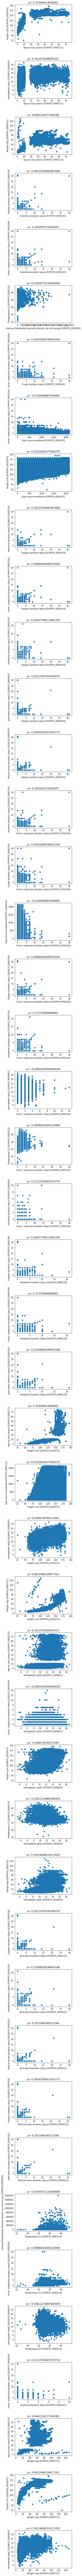

In [150]:
coefficient_table_values = coefficient_table.fillna(0).values
strong_correlated = np.array(np.where(abs(coefficient_table_values)>threshold))
n = strong_correlated.shape[1]
fig, axs = plt.subplots(n,figsize=(5,5*n))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
k = 0

for num in range(n):
        i = strong_correlated[0,:][num]
        j = strong_correlated[1,:][num]
        name1 = float_columns_index[i]
        name2 = float_columns_index[j]
        obs_1 = float_columns[name1].dropna()
        obs_2 = float_columns[name2].dropna()
        dataframe = pd.DataFrame({name1: obs_1, name2: obs_2})
        values = dataframe.dropna().values
        axs[k].scatter(values[:,0],values[:,1])
        axs[k].set_title('p= '+ str(coefficient_table.loc[name1,name2]))
        axs[k].set_xlabel(name1)
        axs[k].set_ylabel(name2)
        k += 1
plt.show()